In [91]:
import nbsetup
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd

In [92]:
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.mcmc import mcmc
from models.sparc.analysis import Analysis
from models.sparc.profile import quality_profiles

In [132]:
all_simulations = load_sparc(namespace='sparc_scalar')

In [133]:
simulations = {}
for k, s in all_simulations.items():
    if s.profile.sparc_dict['Q'] < 3:
        simulations[k] = s

In [134]:
s5 = Result(simulations)
p25 = Result(load_sparc(namespace='sparc_potential_25'))
p5 = Result(load_sparc(namespace='sparc_potential'))

<AxesSubplot:title={'center':'Quality simulation'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

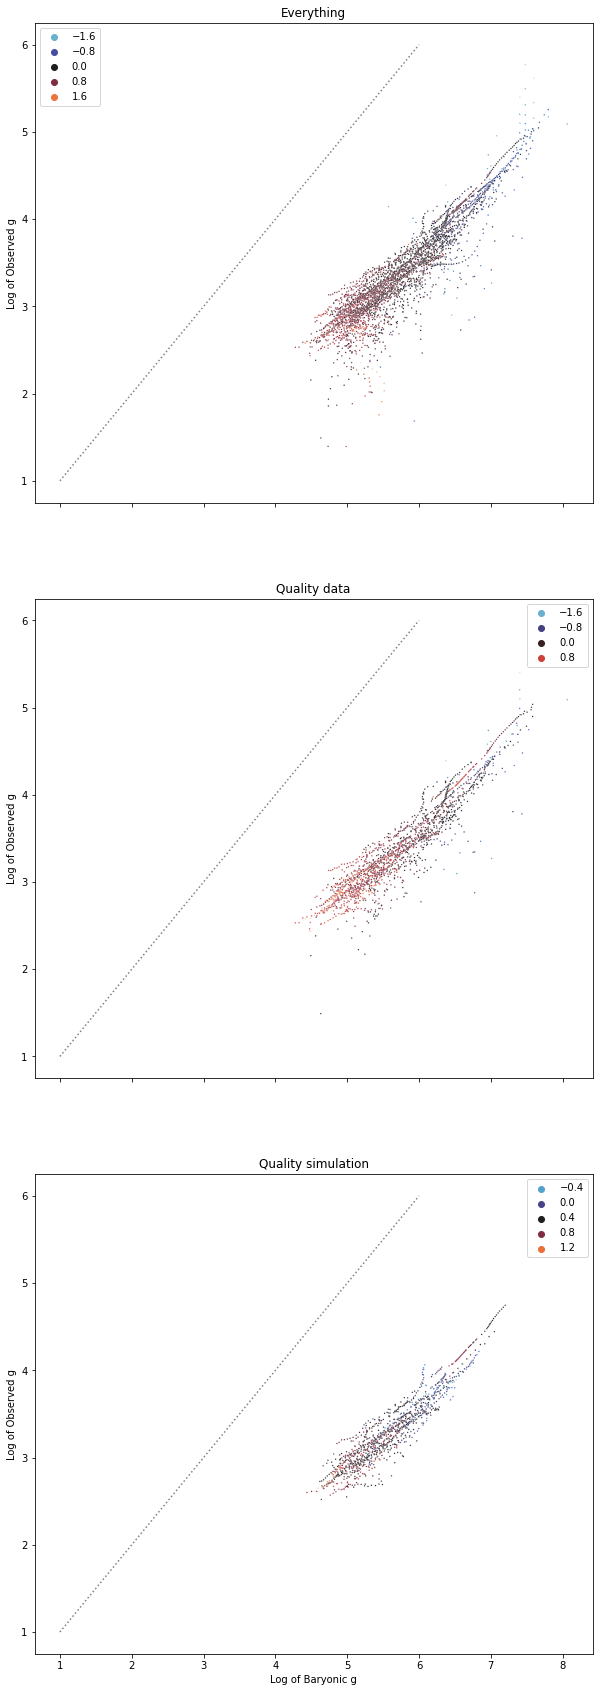

In [143]:
p25.plot_rar()

<AxesSubplot:title={'center':'Quality simulation'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

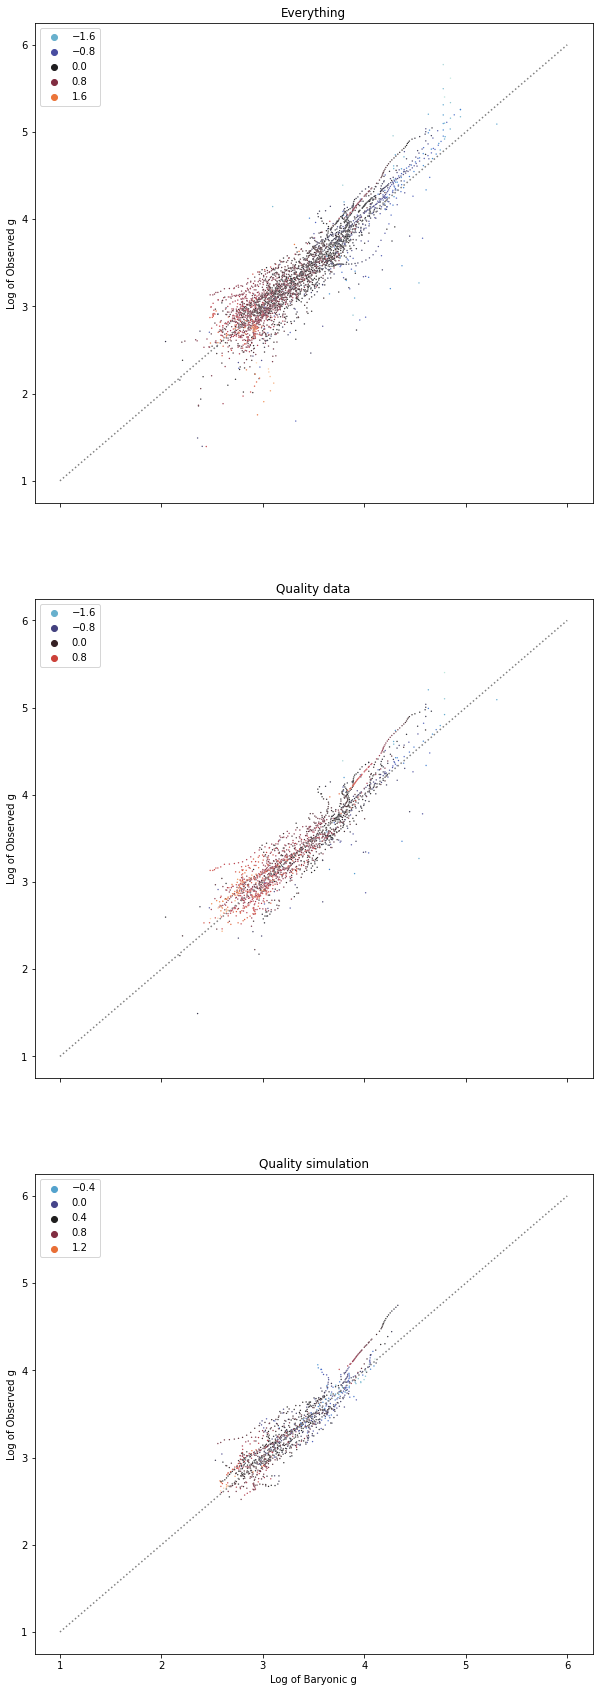

In [116]:
inputs.plot_rar()
#g = inputs.plot_rar(4, query_key='Everything', color='yellow')
#inputs.plot_rar(4, query_key='Quality data', color='orange', axis=g)
#inputs.plot_rar(4, query_key='Quality simulation', color='red', axis=g)

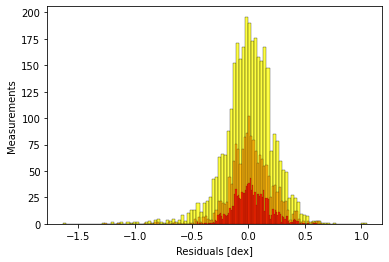

In [117]:
outs = inputs.residual_hists()

In [154]:
aa = Analysis(mcmc(p5.datasets()['Quality simulation'], train_d=False, tight={'Inc': 2, 'D': 4, 'Ymass': 20}), name='Experiment')
outputs = aa.Result(simulations=simulations, fast=True)

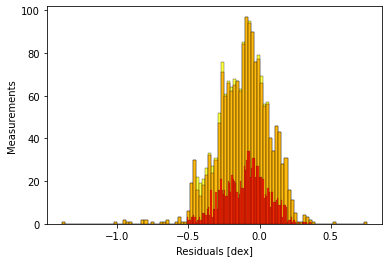

In [155]:
outs = outputs.residual_hists()

<AxesSubplot:title={'center':'Quality simulation'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

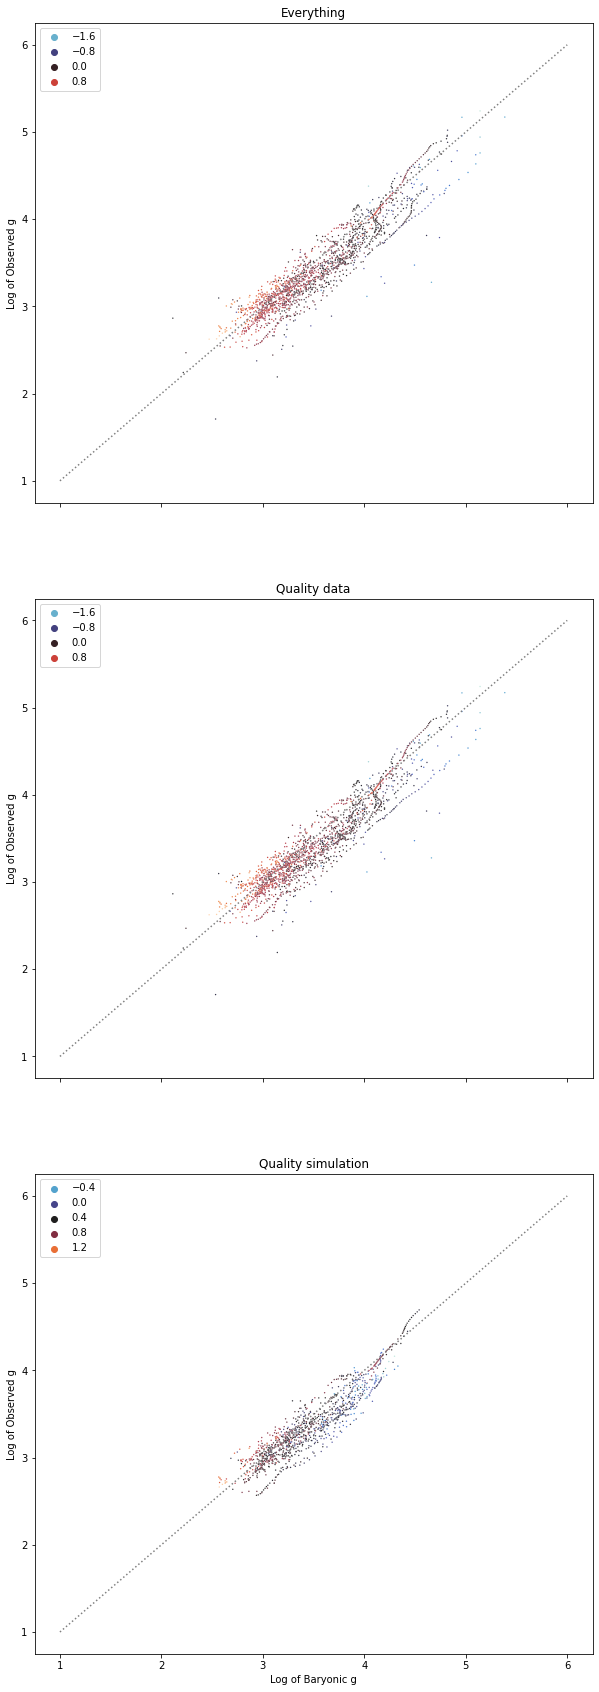

In [156]:
outputs.plot_rar()

In [157]:
for k, o in outs.items():
    print(k, o[1].mean(), o[1].std())

Everything -0.11427935804520395 0.18659167371010368
Quality data -0.10977841588044536 0.18574307087370842
Quality simulation -0.0975052752391478 0.15546289926710166


<AxesSubplot:xlabel='Galaxy in order of SPARC reference parameter value', ylabel='Mass/Luminosity adjustment'>

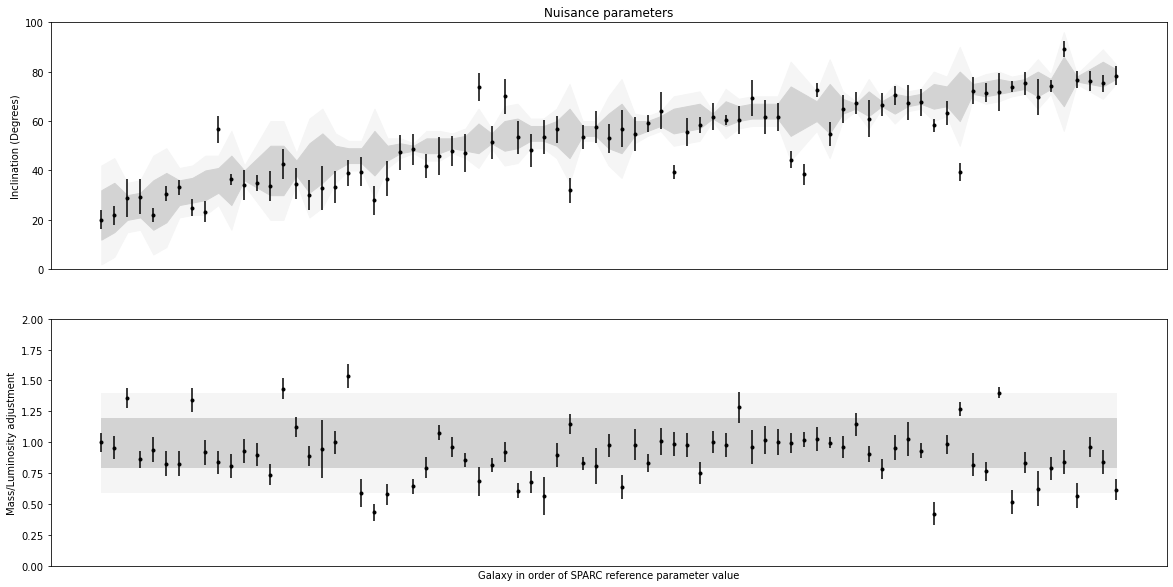

In [159]:
aa.plot_nuissance()

<AxesSubplot:xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

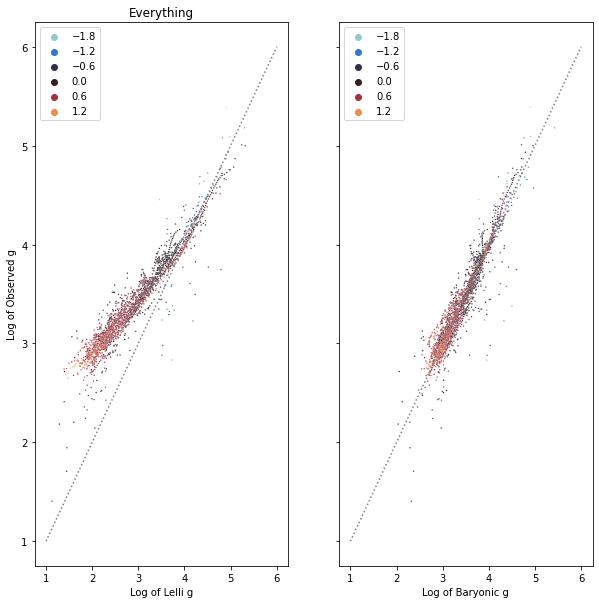

In [85]:
outputs.plot_rar(idens=('V', 'S'))

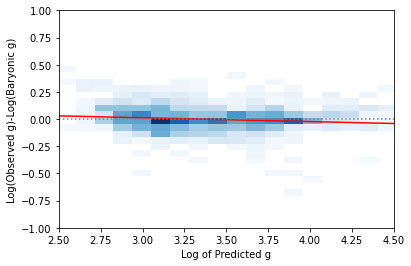

In [86]:
g = outputs.residual(xlim=(2.5,4.5), ylim=(-1,1), xlabel="Log of Predicted g")

In [94]:
aa.uni

{'gamma': array(1.48766782)}

In [79]:
outputs.residual(plot=False).slope

-0.030922542627355627

In [99]:
outputs

In [95]:
standard = Result(load_sparc(namespace='sparc_standard'), adjustments=outputs.adjustments)

<AxesSubplot:title={'center':'Everything'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

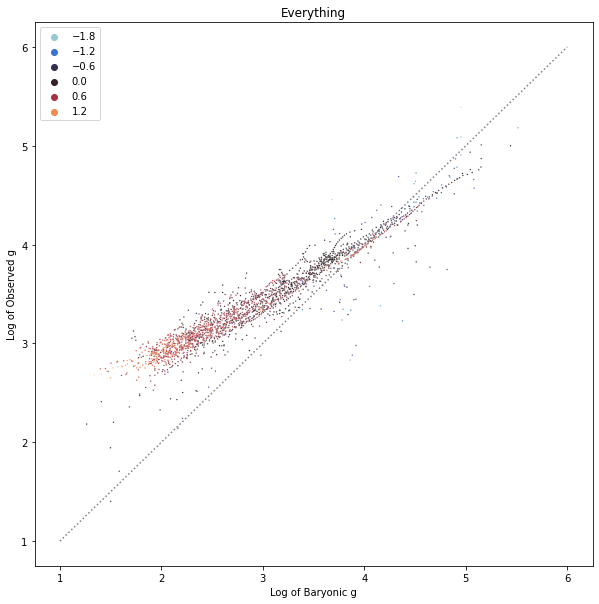

In [96]:
standard.plot_rar()

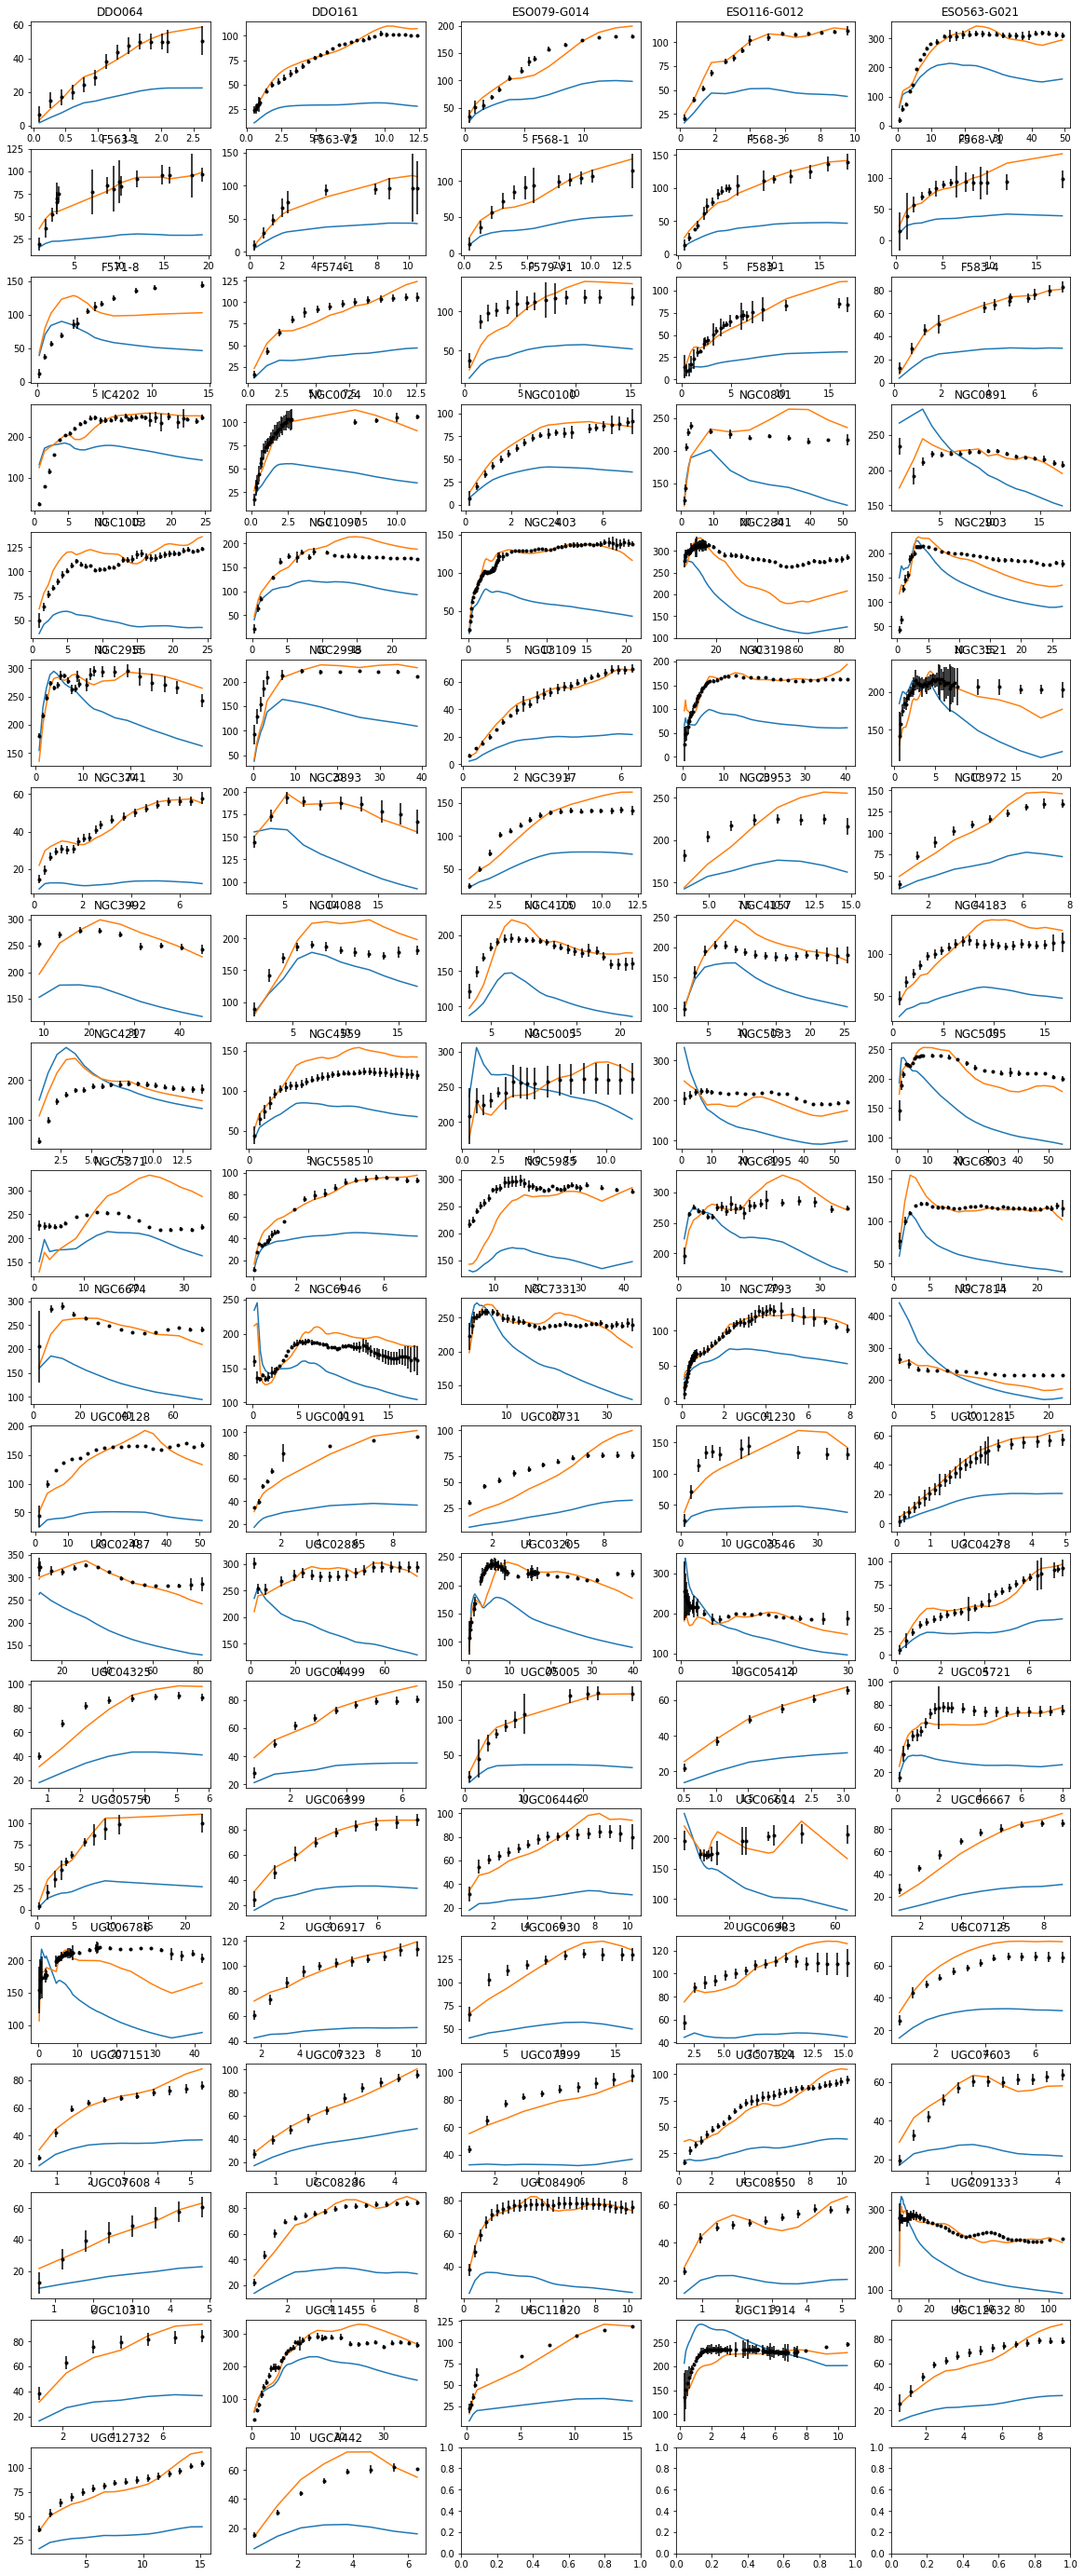

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_velocities(smog, reference, cols=5):    
    groups = smog.dataframe.query('Q == 1').groupby('Galaxy')
    fig, axes = plt.subplots((len(groups)//cols)+1, cols, figsize=(20,50))
    
    i = 0
    for galaxy, df in groups:
        ax = axes[i//cols][i%cols]
        # baryonic
        sdf = reference.dataframe.query('Galaxy=="%s"' % galaxy)
        g = sns.lineplot(x=sdf['R'], y=sdf['Sbar'], ax=ax)
        # smog
        g = sns.lineplot(x=df['R'], y=df['Sbar'], ax=ax)
        # observations
        g.errorbar(df['R'], df['Vobs'], yerr=df['e_Vobs'], fmt='.k')
        # labels
        g.set(title=galaxy, xlabel=None, ylabel=None)
        i += 1

plot_velocities(outputs, standard)

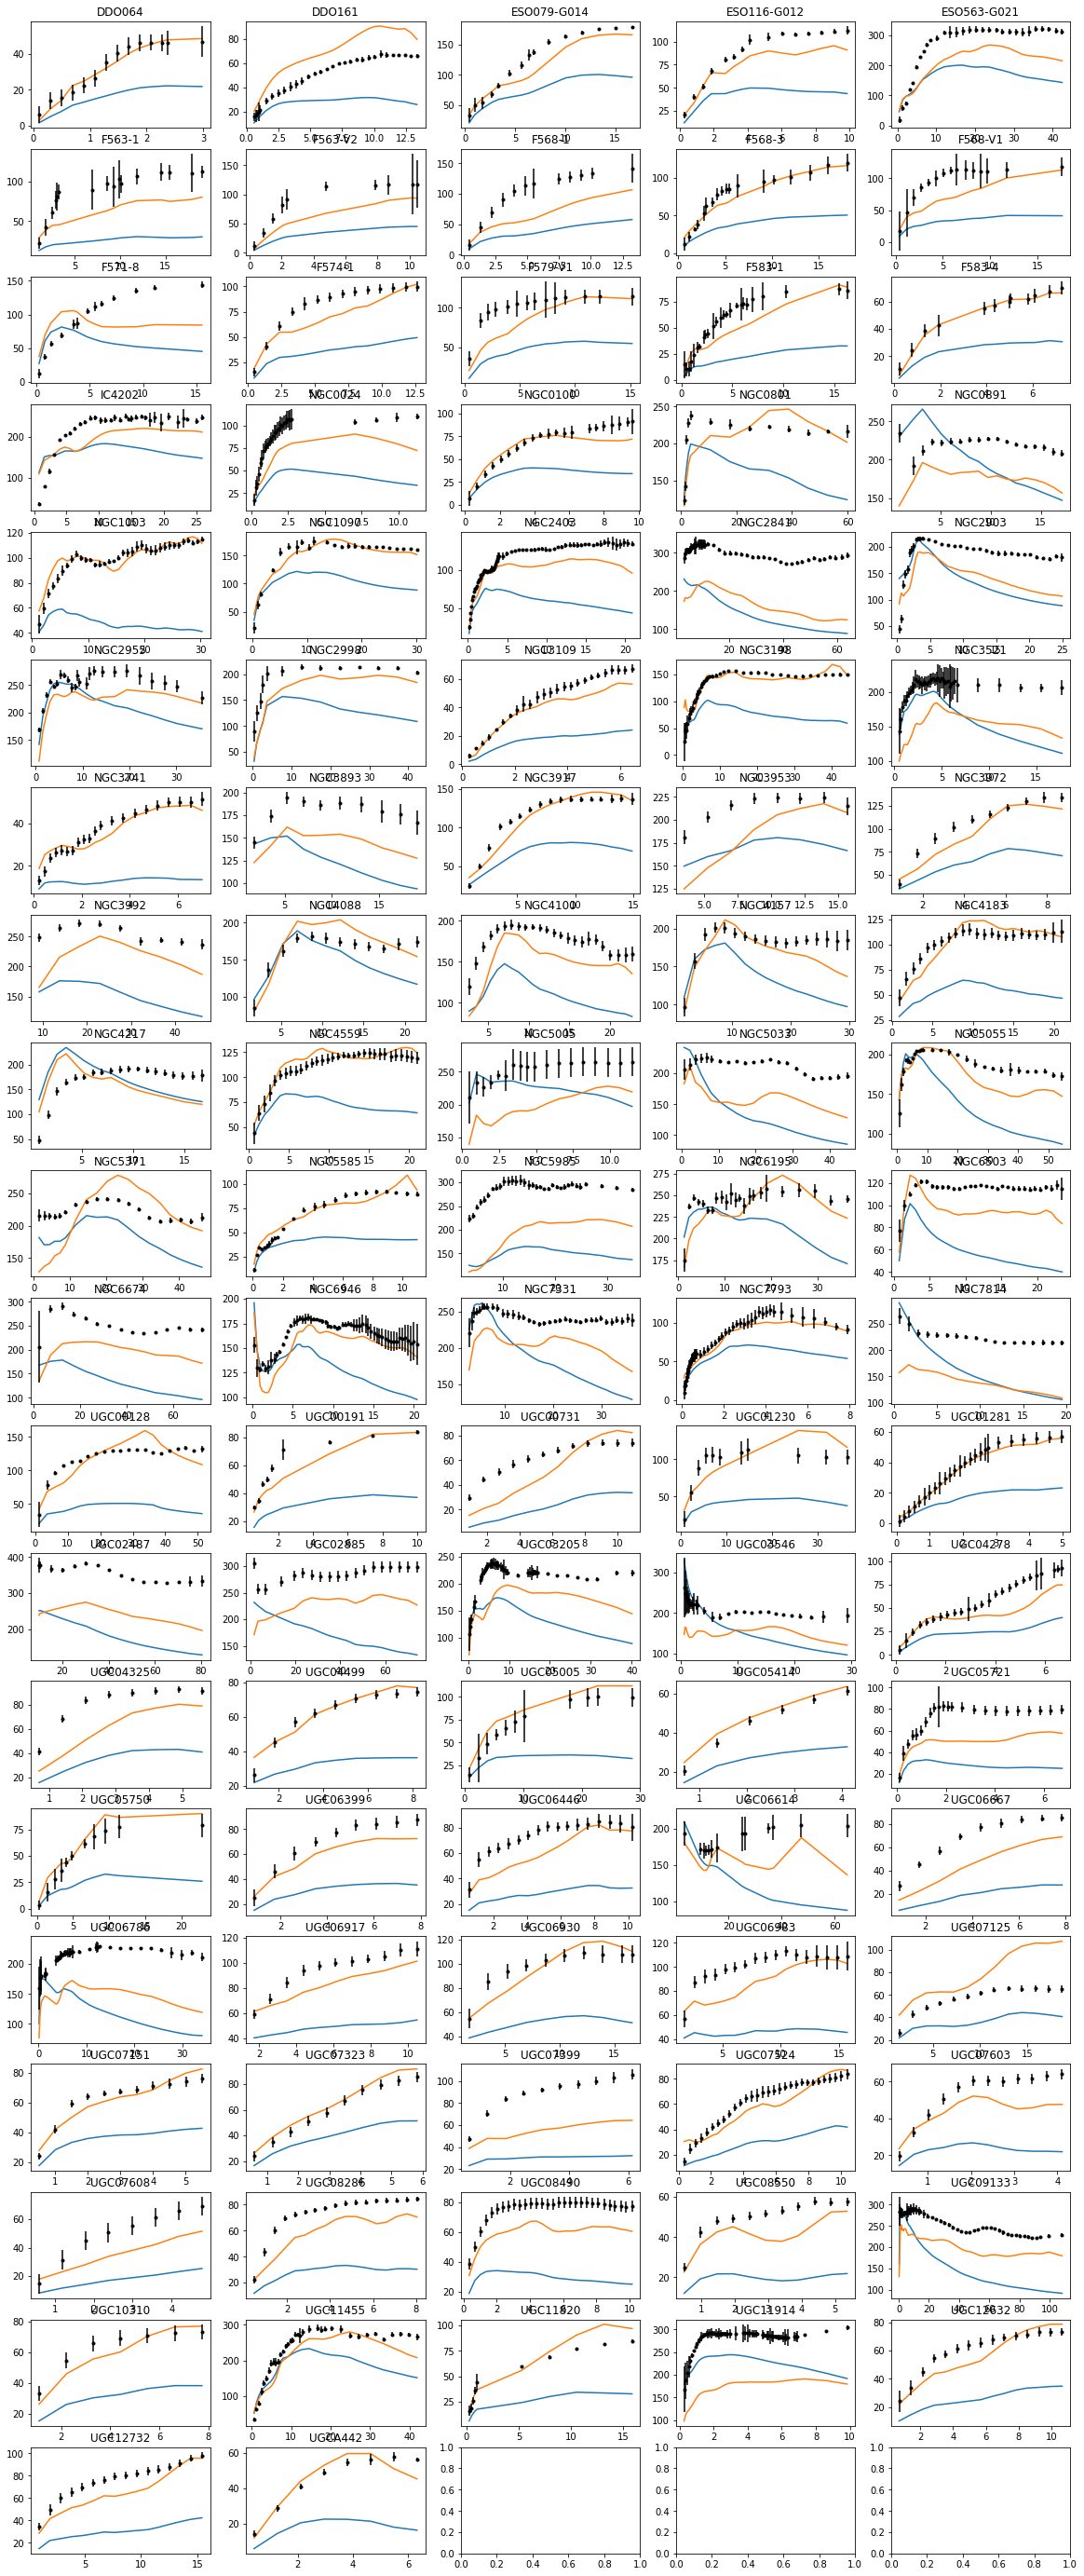

In [92]:
plot_velocities(inputs)